# EDA on Skeleton Data

## Code to Parse Through Nested JSON
#### Code was taken from DS205 class, week 06, notebook 04

In [2]:
#import psycopg2
import os
import json
import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [3]:
 def my_recursive_print_json(j, level = -1):
    "given a json object print it"
    level += 1
    spaces = "    "
    if type(j) is dict:
        dict_2_list = list(j.keys())
        for k in dict_2_list:
            print(spaces * level + k)
            my_recursive_print_json(j[k], level)
            
    elif type(j) is list:
        for (i, l) in enumerate(j):
            print(spaces * level + "[" + str(i) + "]")
            my_recursive_print_json(l, level)
                  
    else:
        print(spaces * level + "value:", str(j))
                

In [4]:
def my_read_nested_json(file_name):
    "given a file of json, read it and parse it meaningfully"
    f = open(file_name, "r")
    j = json.load(f)
    f.close
    my_recursive_print_json(j)

In [5]:
my_read_nested_json("/Users/Shruti/Downloads/Dance_Dataset/densepose/txt/ballet/-5Yp-vToI2E_016_0001.json")

[0]
    [0]
        value: person0
    [1]
        [0]
            value: nose
        [1]
            [0]
                value: 417.8628845214844
            [1]
                value: 172.3057403564453
    [2]
        [0]
            value: left_eye
        [1]
            [0]
                value: 428.8619079589844
            [1]
                value: 164.3126220703125
    [3]
        [0]
            value: right_eye
        [1]
            [0]
                value: 417.8628845214844
            [1]
                value: 164.3126220703125
    [4]
        [0]
            value: left_ear
        [1]
            [0]
                value: 456.8594665527344
            [1]
                value: 174.30401611328125
    [5]
        [0]
            value: right_ear
        [1]
            [0]
                value: 416.8629455566406
            [1]
                value: 173.3048858642578
    [6]
        [0]
            value: left_shoulder
        [1]
            [0]
               

### Functions to Parse JSON and Plot Results

In [8]:
def get_body_position_info(file_name):
    '''Input a JSON file and get the body position of each person.  Outer list is
    list of people.  Inner list is x,y position of each body part for that person'''
    f = open(file_name, "r")
    j = json.load(f)
    f.close
    people= []

    for i,person in enumerate(j):
        #Set up list to collect person's body location
        person_i = []
        count = 0

        #add each body part position to the list
        for body_part in person:
            count+=1
            if count == 1: continue
            else: person_i.append(body_part[1])

        #Append entire list to list of people
        people.append(person_i)

    return people

def get_body_part_labels(file_name):
    '''Input a JSON file and get the body position of each person.  Outer list is
    list of people.  Inner list is x,y position of each body part for that person'''
    f = open(file_name, "r")
    j = json.load(f)
    f.close
    body_part_labels= []
   
    for i,body_part in enumerate(j[0]):
            if i == 0: continue
            else: body_part_labels.append(body_part[0])

    return body_part_labels


body_part_labels = get_body_part_labels('/Users/Shruti/Downloads/Dance_Dataset/densepose/txt/ballet/-5Yp-vToI2E_016_0001.json')
people = get_body_position_info('/Users/Shruti/Downloads/Dance_Dataset/densepose/txt/ballet/-5Yp-vToI2E_016_0002.json')
people[0]

[[417.4290771484375, 171.84947204589844],
 [429.3904113769531, 162.8577117919922],
 [417.4290771484375, 162.8577117919922],
 [457.3002014160156, 176.84487915039062],
 [416.4322814941406, 173.84762573242188],
 [494.1809997558594, 236.78988647460938],
 [404.470947265625, 233.79263305664062],
 [561.9619140625, 295.7358093261719],
 [358.619140625, 271.7578125],
 [480.2261047363281, 319.71380615234375],
 [432.3807373046875, 304.7275695800781],
 [483.2164306640625, 354.6817321777344],
 [425.4032897949219, 353.6826477050781],
 [520.0972290039062, 433.6093444824219],
 [368.5869140625, 451.59283447265625],
 [494.1809997558594, 578.4764404296875],
 [426.4000549316406, 537.5140380859375]]

In [7]:
def plot_body_positions(list_of_people, figsize = (8,4)):
    plt.figure(figsize=figsize)
    for i,person in enumerate(list_of_people):
        x_values = [point[0] for point in person]
        y_values = [point[1] for point in person]
        y_values = [800 - i for i in y_values]
        plt.scatter(x_values, y_values, label=f'Person {i}')
        plt.xlabel('X position')
        plt.ylabel('Y position')
        plt.title('Scatter plot of body positions in X-Y space')
    plt.legend(loc = 'upper left', fontsize = 'small')
    plt.show()

## Basic Exploration of Dance Types

### Ballet

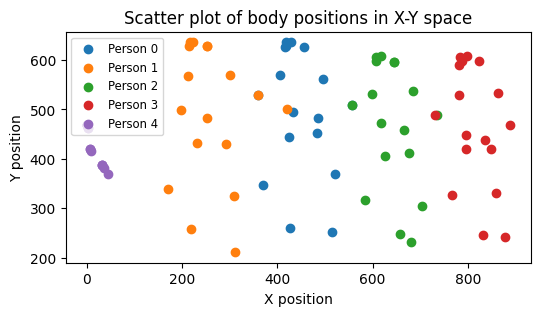

In [7]:
people = get_body_position_info('/Users/Shruti/Downloads/Dance_Dataset/densepose/txt/ballet/-5Yp-vToI2E_016_0001.json')
plot_body_positions(people, figsize=(6,3))

### Break Dancing

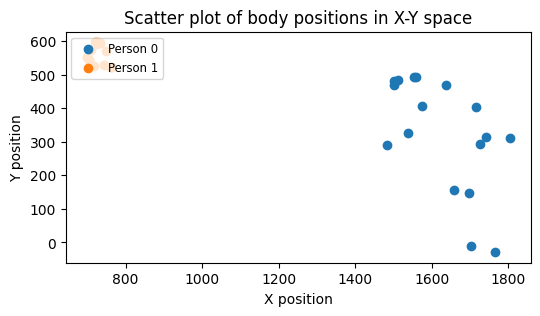

In [8]:
people = get_body_position_info('/Users/Shruti/Downloads/Dance_Dataset/densepose/txt/break/_eqF-TA8TVQ_043_0001.json')
plot_body_positions(people, figsize=(6,3))

### Latin

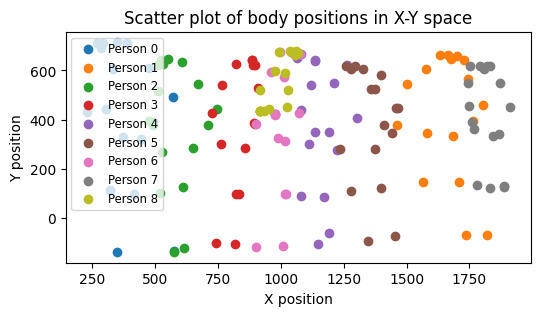

In [9]:
people = get_body_position_info('/Users/Shruti/Downloads/Dance_Dataset/densepose/txt/latin/_530Y1Him7s_232_0001.json')
plot_body_positions(people, figsize=(6,3))

### Swing

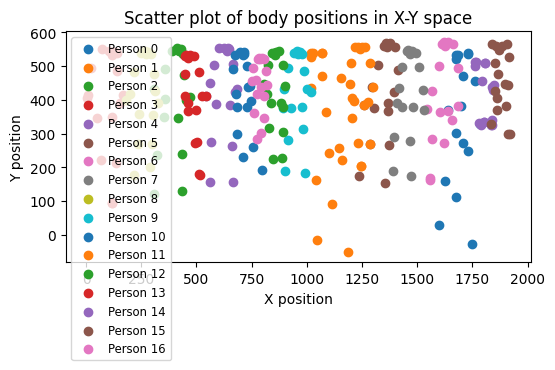

In [10]:
people = get_body_position_info('/Users/Shruti/Downloads/Dance_Dataset/densepose/txt/swing/_FidGI7J718_039_0001.json')
plot_body_positions(people, figsize=(6,3))

# Parsing Files & Directories
### Collect Directory Names, File Names, Number of Videos, and First Image Indexes

In [11]:
directory = '/Users/Shruti/Downloads/Dance_Dataset/densepose/txt'

#get directories without hidden files
directories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
directories.sort()

#Setup dictionary to collect file names
all_file_names = {}

#Identify all file names
for d in directories:
    #get file names without hidden files
    files = [f for f in os.listdir(os.path.join(directory, d)) if os.path.isfile(os.path.join(directory, d, f))]
    files.sort()
    all_file_names[d] = files

In [12]:
#Count the number of videos in each video type
#Determined by checking last number string on each image and
#checking if it matches '0001'
num_videos = {}
first_img_indexes = {}

for d in directories:
    video_count = 0
    num_images = len(all_file_names[d])
    for i in range(num_images):
        if all_file_names[d][i].split('.')[0].split('_')[-1] == '0001':
            video_count += 1
    num_videos[d] = video_count

In [13]:
#Print out summary results
print(f"{'dance':<9} | {'Num Images':<10} | {'Num Videos':<9}")
print("-"*35)
for k,v in all_file_names.items():
    print(f'{k:<9} | {len(v):<10} | {num_videos[k]}')

dance     | Num Images | Num Videos
-----------------------------------
ballet    | 22410      | 89
break     | 25622      | 95
cha       | 28098      | 98
flamenco  | 24755      | 88
foxtrot   | 23738      | 79
jive      | 29100      | 106
latin     | 24460      | 90
pasodoble | 26607      | 98
quickstep | 24036      | 82
rumba     | 27262      | 94
samba     | 25807      | 96
square    | 27453      | 97
swing     | 26337      | 95
tango     | 24020      | 80
tap       | 28541      | 95
waltz     | 24380      | 80


In [14]:
#Dictionary that contains, for each dance type, the index of the first image
#name of anindividual video file
first_img_indexes = {}

for d in directories:
    num_images = len(all_file_names[d])
    img_count = 0
    first_images = []
    for i in range(num_images):
        if all_file_names[d][i].split('.')[0].split('_')[-1] == '0001':
            first_images.append(img_count)
            #img_count = 0
        img_count += 1
    first_img_indexes[d] = first_images

all_file_names['ballet'][386]

'0aUhNK8tJPU_035_0001.json'

### Test Person Tracking Over Multiple Frames in Video

Filename: -5Yp-vToI2E_016_0031.json


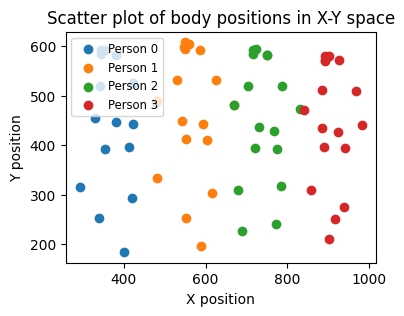

Filename: -5Yp-vToI2E_016_0032.json


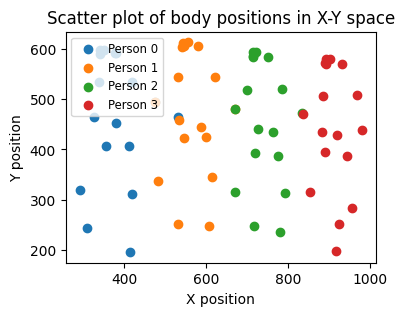

Filename: -5Yp-vToI2E_016_0033.json


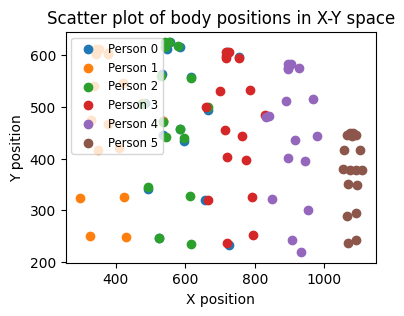

Filename: -5Yp-vToI2E_016_0034.json


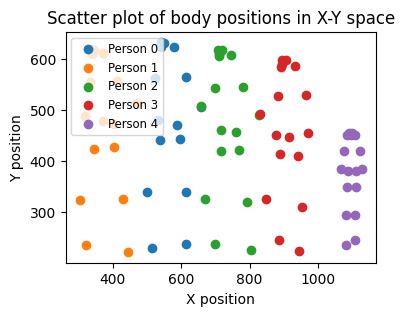

Filename: -5Yp-vToI2E_016_0035.json


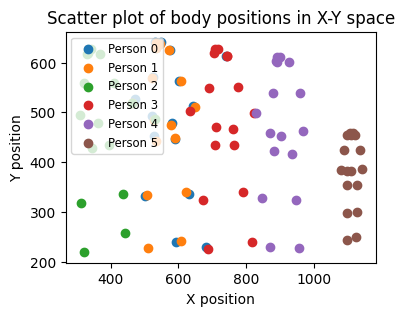

In [15]:
#Explore preliminary data
dance_type = 'ballet'

#Collect files names from specific video
video_num = 0 #Starts counting with 0
start = first_img_indexes[dance_type][video_num]
stop = first_img_indexes[dance_type][video_num + 1]
file_names = all_file_names[dance_type][start:stop]

#Plot the frames
for file in file_names[30:35]:
    print(f'Filename: {file}')
    file_path = os.path.join(directory, dance_type, file)
    people = get_body_position_info(file_path)
    plot_body_positions(people, figsize = (4,3))


### Count the number of people per frame in a given video

In [16]:
def plot_num_ppl_detected(num_ppl_list, figsize = (8,4)):
    '''Plots the number of people detected in each frame over
    the range of a full video'''
    plt.figure(figsize=figsize)
    frame_num = list(range(len(num_ppl_list)))
    plt.plot(frame_num, num_ppl_list)
    plt.xlabel('Frame Number')
    plt.ylabel('Number of People Detected')
    plt.show()

In [17]:
dance_type = 'ballet'

#Collect files names from specific video
video_num = 3 #Starts counting with 0
start = first_img_indexes[dance_type][video_num]
stop = first_img_indexes[dance_type][video_num + 1]
file_names = all_file_names[dance_type][start:stop]

num_ppl_detected = []
for file in file_names:
    file_path = os.path.join(directory, dance_type, file)
    people = get_body_position_info(file_path)
    num_ppl_detected.append(len(people))


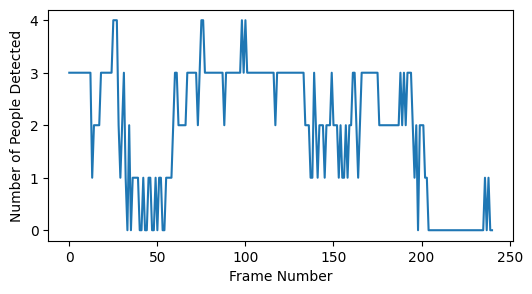

In [18]:
plot_num_ppl_detected(num_ppl_detected, figsize = (6,3))

Note:  This will be an issue.  People come in and out of tracking, so it will be challenging to keep track of who's who if we want to capture temporal information

### Track motion of specific body parts

In [19]:
#Set up indexes to important body parts
nose_index = 0
right_shoulder_index = 6
right_hip_index = 12
right_ankle_index = 16
body_part_labels = ['Nose', 'Right Shoulder', 'Right Hip', 'Right Ankle']
body_part_indexes = [nose_index, right_shoulder_index, right_hip_index, right_ankle_index]

In [20]:
def get_one_body_part_info(file_path, body_part_index):
    '''Pull out the x,y coordinate of the given body part index
    Returns value for a single frame as a list of all people identified
    in the frame'''
    f = open(file_path, "r")
    j = json.load(f)
    f.close
    body_part_location = []
  
    for i,person in enumerate(j):
        body_part_info = person[body_part_index + 1][1]
        body_part_location.append(body_part_info)
    return body_part_location

def get_one_body_part_motion(dance_type, first_img_indexes, all_file_names, directory, video_num = 0, body_part_index = 0):
    '''Collect the location of a specific body part for all people over a full video
    dance type = string of dance type selection
    first_img_indexes = index of all starting points of each video
    all_file_names = compilation of all image names
    directory = directory info
    video num = seletion of video'''
    video_num = video_num 
    start = first_img_indexes[dance_type][video_num]
    stop = first_img_indexes[dance_type][video_num + 1]
    file_names = all_file_names[dance_type][start:stop]

    body_part_over_frames= []
    for file in file_names:
        file_path = os.path.join(directory, dance_type, file)
        body_part_info = get_one_body_part_info(file_path, body_part_index)
        body_part_over_frames.append(body_part_info)
    return body_part_over_frames

def get_one_person_one_body_part(one_body_part_info, person_num = 0):
    '''Takes the list of a body part location for all people over a full
    video and pulls out the info for a single selected person'''
    person_n_body_part_position = []
    for frame in one_body_part_info:
        person_n_body_part_position.append(frame[person_num])
    return person_n_body_part_position
        
def plot_single_body_part(body_part_position, body_part_name, figsize = (6,3)):
    '''Plots the tracked location of a body part for a given person
    over all frames in a video'''
    plt.figure(figsize=figsize)
    x_values = [point[0] for point in body_part_position]
    y_values = [point[1] for point in body_part_position]
    y_values = [800 - i for i in y_values]
    plt.scatter(x_values, y_values)
    plt.xlabel('X position')
    plt.ylabel('Y position')
    plt.xlim(0, 800)  
    plt.ylim(0, 800)  
    plt.title(f'{body_part_name} position over full video')
    plt.show()

def plot_body_part_delta(body_part_position, body_part_name, figsize = (6,3)):
    '''Plots the tracked location of a body part for a given person
    over all frames in a video'''
    plt.figure(figsize=figsize)
    x_values = [point[0] for point in body_part_position]
    y_values = [point[1] for point in body_part_position]
    y_values = [800 - i for i in y_values]
    delta_x = [x_values[i] - x_values[i-1] for i in range(1, len(x_values))]
    delta_y = [y_values[i] - y_values[i-1] for i in range(1, len(y_values))]
    plt.scatter(delta_x, delta_y)
    plt.xlabel('X position')
    plt.ylabel('Y position')
    plt.xlim(-500, 500)  
    plt.ylim(-500, 500)  
    plt.title(f'Change in {body_part_name} position between frames')
    plt.show()


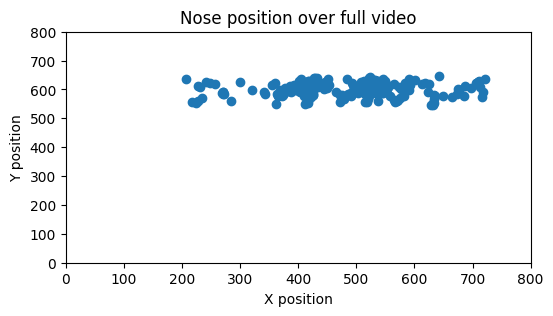

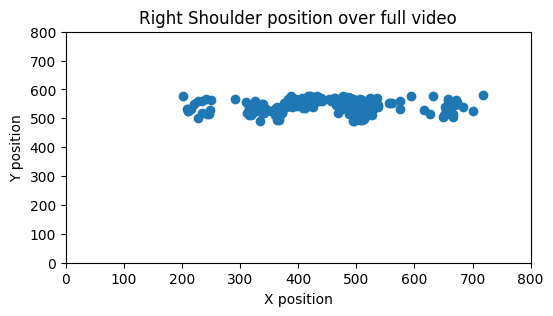

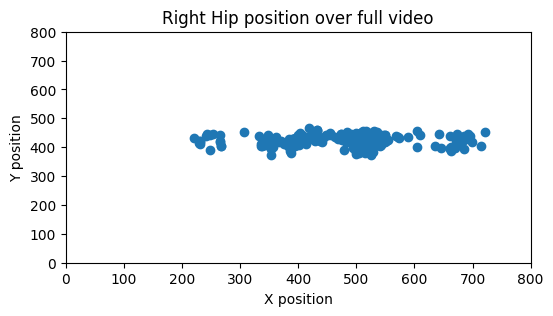

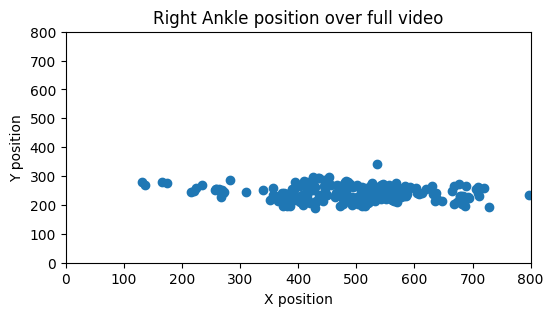

In [21]:
for i,body_part_index in enumerate(body_part_indexes):
    temp_body_part_info = get_one_body_part_motion('ballet', first_img_indexes, all_file_names, 
                                                   directory, video_num = 0, body_part_index = body_part_index)
    person_0_info = get_one_person_one_body_part(temp_body_part_info, person_num = 0)
    plot_single_body_part(person_0_info, body_part_labels[i], figsize = (6,3))

Note: The position of each body part moves drastically across the frame.  Likely because the `person 0` that's captured is changing between frames

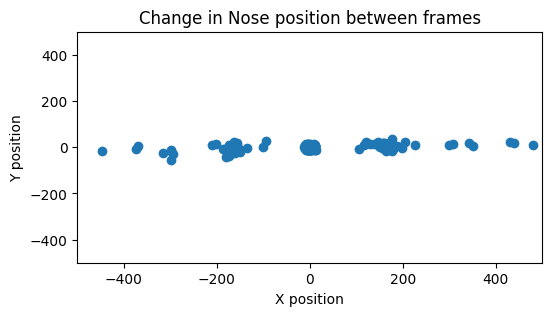

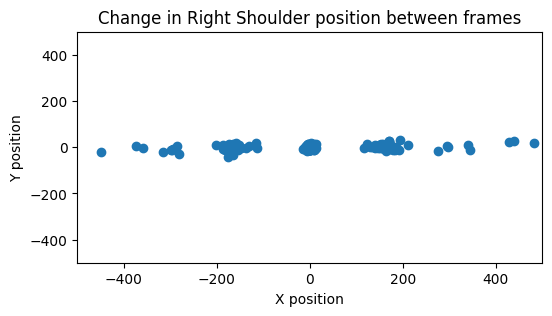

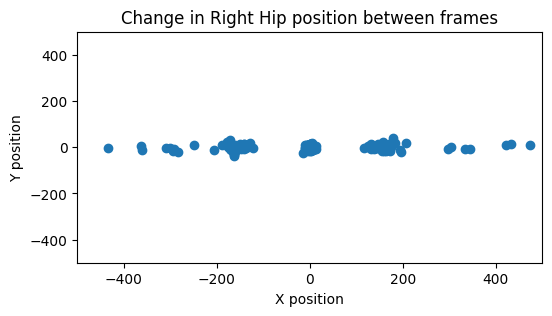

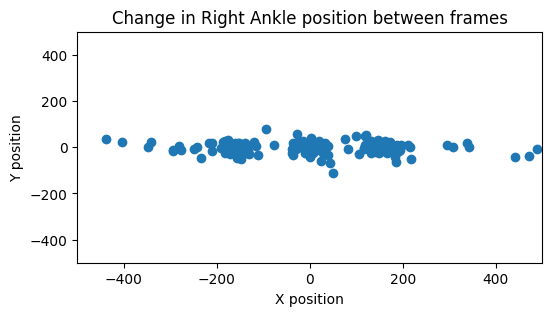

In [22]:
for i,body_part_index in enumerate(body_part_indexes):
    temp_body_part_info = get_one_body_part_motion('ballet', first_img_indexes, all_file_names, 
                                                   directory, video_num = 0, body_part_index = body_part_index)
    person_0_info = get_one_person_one_body_part(temp_body_part_info, person_num = 0)
    plot_body_part_delta(person_0_info, body_part_labels[i], figsize = (6,3))

Note:  Plotting the delta (change in position between frames) confirms the suspicion.  Any body part should not move very much between 2 frames since 1 frame = 1/30 of a second.  

The person tracking software is switching who `person 0` is between each frame.  You can also see the each person's individual cluster of datapoints.